# Between Concrete & Countryside - The Urban-Rural Divide in Environmental Views

## General Information

This project examines urban-rural differences in environmental attitudes and behaviours across Europe.

**Authors:** Azizbek Ussenov, Alex Duni, Anna Heckhausen

**Date:** 15 December 2024

**Data:**
In this project, we use data from the ESS and from the WorldBank. You can access this data under the following links.

[ESS data (Round 8)](https://ess.sikt.no/en/datafile/ffc43f48-e15a-4a1c-8813-47eda377c355/93?tab=0)

[WorldBank data](https://ess.sikt.no/en/datafile/ffc43f48-e15a-4a1c-8813-47eda377c355/93?tab=0): 2016, Indicator: Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative); selected countries from ESS without Israel and Russia



<hr>

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
survey_df = pd.read_csv('Data/ESS8e02_3.csv')
survey_df.head()

/var/folders/xv/bb6vqsv155qb6_tyzdzfys8c0000gn/T/ipykernel_32506/702031461.py:1: DtypeWarning: Columns (168) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_df = pd.read_csv('Data/ESS8e02_3.csv')


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
0,ESS8e02_3,8,2.3,23.11.2023,1,AT,0.611677,1.178495,0.370393,0.436506,...,12,2016,7,37,5,12,2016,8,33,50.0
1,ESS8e02_3,8,2.3,23.11.2023,2,AT,1.223354,0.899471,0.370393,0.333158,...,11,2016,9,39,25,11,2016,11,10,86.0
2,ESS8e02_3,8,2.3,23.11.2023,4,AT,0.389058,0.315753,0.370393,0.116953,...,11,2016,17,17,22,11,2016,18,0,38.0
3,ESS8e02_3,8,2.3,23.11.2023,6,AT,0.642594,0.472467,0.370393,0.174999,...,10,2016,19,9,11,10,2016,19,59,46.0
4,ESS8e02_3,8,2.3,23.11.2023,10,AT,3.432402,2.246706,0.370393,0.832164,...,12,2016,10,31,1,12,2016,11,49,70.0


In [3]:
survey_df.describe()

,essround,edition,idno,dweight,pspwght,pweight,anweight,nwspol,netusoft,netustm,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
count,44387.0,4.438700e+04,4.438700e+04,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,...,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,43250.000000
mean,8.0,2.300000e+00,3.154578e+07,1.000000,1.000000,1.174817,1.174817,189.470701,3.862077,2299.033343,...,8.177214,2020.365512,14.334310,25.562890,15.853741,8.152883,2018.027553,16.113412,29.491675,65.225272
std,0.0,1.811460e-12,1.155417e+08,0.390219,0.548561,1.301596,1.923216,962.889443,1.594919,3063.010782,...,4.329691,177.674958,3.947528,18.514428,8.731993,4.041277,113.658562,8.608613,18.768750,26.680245
min,8.0,2.300000e+00,1.000000e+00,0.036070,0.018145,0.030226,0.007141,0.000000,1.000000,0.000000,...,1.000000,2016.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000
25%,8.0,2.300000e+00,1.208000e+03,0.915591,0.694870,0.239750,0.187990,30.000000,3.000000,120.000000,...,5.000000,2016.000000,12.000000,9.000000,8.000000,5.000000,2016.000000,13.000000,14.000000,50.000000
50%,8.0,2.300000e+00,2.589000e+03,1.000000,0.920021,0.520820,0.475879,60.000000,5.000000,240.000000,...,10.000000,2016.000000,14.000000,24.000000,16.000000,10.000000,2016.000000,16.000000,29.000000,60.000000
75%,8.0,2.300000e+00,1.105750e+04,1.044025,1.169933,2.013008,1.739004,90.000000,5.000000,6666.000000,...,11.000000,2017.000000,17.000000,41.000000,23.000000,11.000000,2017.000000,18.000000,45.000000,75.000000
max,8.0,2.300000e+00,5.516031e+08,6.206992,4.002002,4.985758,19.945196,9999.000000,9.000000,9999.000000,...,99.000000,9999.000000,99.000000,99.000000,99.000000,99.000000,9999.000000,99.000000,99.000000,1083.000000


In [4]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44387 entries, 0 to 44386
Columns: 535 entries, name to inwtm
dtypes: float64(227), int64(298), object(10)
memory usage: 181.2+ MB


Selecting only columns according to the research interest

In [5]:
data_needed = survey_df[['idno', 'cntry', 'domicil', 'wrclmch', 'clmthgt2', 'ccgdbd', 'eneffap', 'rdcenr', 'ccrdprs', 'eisced', 'lrscale']]
data_needed.head()

,idno,cntry,domicil,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale
0,1,AT,1,4,4,10,8,4,8,7,0
1,2,AT,1,4,4,2,10,5,7,4,1
2,4,AT,4,4,4,2,9,4,8,3,5
3,6,AT,1,3,3,7,10,4,6,3,0
4,10,AT,3,4,2,5,10,6,6,3,5


In [6]:
data_needed.isna().sum()

idno        0
cntry       0
domicil     0
wrclmch     0
clmthgt2    0
ccgdbd      0
eneffap     0
rdcenr      0
ccrdprs     0
eisced      0
lrscale     0
dtype: int64

<hr>

In [7]:
data_needed['cntry'].unique()

array(['AT', 'BE', 'CH', 'CZ', 'DE', 'EE', 'ES', 'FI', 'FR', 'GB', 'HU',
       'IE', 'IL', 'IS', 'IT', 'LT', 'NL', 'NO', 'PL', 'PT', 'RU', 'SE',
       'SI'], dtype=object)

Remove countries that are not part of Europe (Russian Federation, Israel) and Ensure no 'RU' or 'IS'

In [8]:
data_needed = data_needed[~data_needed['cntry'].isin(['RU', 'IL'])]

if data_needed['cntry'].isin(['RU', 'IL']).any():
    print("Still: 'RU' or 'IL'")
else:
    print("No: 'RU' or 'IL'")

No: 'RU' or 'IL'


<hr>

##### Recoding `domicil` into two category 'City' and 'Rural'

**Table: domicil**

| **Value** | **Category**                             |
|-----------|------------------------------------------|
| 1         | A big city                               |
| 2         | Suburbs or outskirts of big city         |
| 3         | Town or small city                       |
| 4         | Country village                          |
| 5         | Farm or home in countryside              |
| 7         | Refusal*                                 |
| 8         | Don't know*                              |
| 9         | No answer*                               |

(*) Missing Value


In [9]:
def classify_area(value):
    if value in [1, 2, 3]:
        return 'City'
    elif value in [4, 5]:
        return 'Rural'
    else:
        return None

data_needed['area_type'] = data_needed['domicil'].apply(classify_area)

In [10]:
data_needed = data_needed.dropna(subset=['area_type']).reset_index(drop=True)
data_needed['area_type'].value_counts()
data_needed.drop(columns=['domicil'], inplace=True)

data_needed

,idno,cntry,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type
0,1,AT,4,4,10,8,4,8,7,0,City
1,2,AT,4,4,2,10,5,7,4,1,City
2,4,AT,4,4,2,9,4,8,3,5,Rural
3,6,AT,3,3,7,10,4,6,3,0,City
4,10,AT,4,2,5,10,6,6,3,5,City
...,...,...,...,...,...,...,...,...,...,...,...
39353,1303,SI,3,3,5,10,5,5,4,1,Rural
39354,1304,SI,3,3,5,5,3,4,6,5,City
39355,1305,SI,4,4,1,10,6,7,6,0,City
39356,1306,SI,3,4,4,8,4,7,7,4,City


<hr>

### Creating a new table about proportion of area and rural people per country

In [11]:
area_summary = data_needed.groupby(['cntry', 'area_type']).size().unstack(fill_value=0)

area_summary['Total'] = area_summary.sum(axis=1)
area_summary['City %'] = (area_summary['City'] / area_summary['Total']) * 100
area_summary['Rural %'] = (area_summary['Rural'] / area_summary['Total']) * 100

area_summary.rename(columns={'City': 'City Absolute', 'Rural': 'Rural Absolute'}, inplace=True)

In [12]:
area_summary

area_type,City Absolute,Rural Absolute,Total,City %,Rural %
cntry,,,,,
AT,1053,957,2010,52.388060,47.611940
BE,861,905,1766,48.754247,51.245753
CH,659,866,1525,43.213115,56.786885
CZ,1536,733,2269,67.695020,32.304980
DE,1906,945,2851,66.853736,33.146264
EE,1426,593,2019,70.629024,29.370976
ES,1028,926,1954,52.610031,47.389969
FI,1211,712,1923,62.974519,37.025481
FR,1314,756,2070,63.478261,36.521739


In [13]:
total_row = area_summary.sum(numeric_only=True)
total_row['City %'] = (total_row['City Absolute'] / total_row['Total']) * 100
total_row['Rural %'] = (total_row['Rural Absolute'] / total_row['Total']) * 100
area_summary.loc['Total'] = total_row

In [14]:
area_summary

area_type,City Absolute,Rural Absolute,Total,City %,Rural %
cntry,,,,,
AT,1053.0,957.0,2010.0,52.388060,47.611940
BE,861.0,905.0,1766.0,48.754247,51.245753
CH,659.0,866.0,1525.0,43.213115,56.786885
CZ,1536.0,733.0,2269.0,67.695020,32.304980
DE,1906.0,945.0,2851.0,66.853736,33.146264
EE,1426.0,593.0,2019.0,70.629024,29.370976
ES,1028.0,926.0,1954.0,52.610031,47.389969
FI,1211.0,712.0,1923.0,62.974519,37.025481
FR,1314.0,756.0,2070.0,63.478261,36.521739


<hr>

### Environmental attitudes Proprocessing: wrclmch, clmthgt1, ccgdbd

##### Removing NA values

<table>
  <tr>
    <td>
      <b>Table 1: wrclmch</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Not at all worried</td></tr>
        <tr><td>2</td><td>Not very worried</td></tr>
        <tr><td>3</td><td>Somewhat worried</td></tr>
        <tr><td>4</td><td>Very worried</td></tr>
        <tr><td>5</td><td>Extremely worried</td></tr>
        <tr><td>6</td><td>Not applicable*</td></tr>
        <tr><td>7</td><td>Refusal*</td></tr>
        <tr><td>8</td><td>Don't know*</td></tr>
        <tr><td>9</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
    <td>
      <b>Table 2: clmthgt2</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Not at all</td></tr>
        <tr><td>2</td><td>Very little</td></tr>
        <tr><td>3</td><td>Some</td></tr>
        <tr><td>4</td><td>A lot</td></tr>
        <tr><td>5</td><td>A great deal</td></tr>
        <tr><td>6</td><td>Not applicable*</td></tr>
        <tr><td>7</td><td>Refusal*</td></tr>
        <tr><td>8</td><td>Don't know*</td></tr>
        <tr><td>9</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
    <td>
      <b>Table 3: ccgdbd</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Extremely bad</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>Extremely good</td></tr>
        <tr><td>66</td><td>Not applicable*</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
  </tr>
</table>


In [15]:
data_needed = data_needed[~data_needed['wrclmch'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['clmthgt2'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['ccgdbd'].isin([66,77, 88, 99])]

### Lets reverse the scaling of `ccgdbd` to align with the context of other two environmental attitude variables

In [16]:
def reverse_scale(value):
    reverse_mapping = {
        0: 10,   # Extremely good
        1: 9,
        2: 8,
        3: 7,
        4: 6,
        5: 5,
        6: 4,
        7: 3,
        8: 2,
        9: 1,
        10: 0   # Extremely bad
    }
    return reverse_mapping.get(value, value)

data_needed['ccgdbd_reversed'] = data_needed['ccgdbd'].apply(reverse_scale)
data_needed.drop(columns=['ccgdbd'], inplace = True)


In [17]:
data_needed

,idno,cntry,wrclmch,clmthgt2,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type,ccgdbd_reversed
0,1,AT,4,4,8,4,8,7,0,City,0
1,2,AT,4,4,10,5,7,4,1,City,8
2,4,AT,4,4,9,4,8,3,5,Rural,8
3,6,AT,3,3,10,4,6,3,0,City,3
4,10,AT,4,2,10,6,6,3,5,City,5
...,...,...,...,...,...,...,...,...,...,...,...
39353,1303,SI,3,3,10,5,5,4,1,Rural,5
39354,1304,SI,3,3,5,3,4,6,5,City,5
39355,1305,SI,4,4,10,6,7,6,0,City,9
39356,1306,SI,3,4,8,4,7,7,4,City,6


### Environmental behaviours Proprocessing: wrclmch, clmthgt1, ccgdbd

<table>
  <tr>
    <td>
      <b>Table 1: eneffap</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Not at all likely</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>Extremely likely</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
    <td>
      <b>Table 2: rdcenr</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Never</td></tr>
        <tr><td>2</td><td>Hardly ever</td></tr>
        <tr><td>3</td><td>Sometimes</td></tr>
        <tr><td>4</td><td>Often</td></tr>
        <tr><td>5</td><td>Very often</td></tr>
        <tr><td>6</td><td>Always</td></tr>
        <tr><td>55</td><td>Cannot reduce energy use</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
    <td>
      <b>Table 3: ccrdprs</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Not at all</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>A great deal</td></tr>
        <tr><td>66</td><td>Not applicable*</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
  </tr>
</table>


In [18]:
data_needed = data_needed[~data_needed['eneffap'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['rdcenr'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['ccrdprs'].isin([66, 77, 88, 99])]

##### Recoding 55 to 1 to have a common scale

In [19]:
def recode_rdcenr(value):
    if value == 55:
        return 1
    else:
        return value

data_needed['rdcenr_recode'] = data_needed['rdcenr'].apply(recode_rdcenr)

In [20]:
data_needed[['wrclmch', 'clmthgt2', 'ccgdbd_reversed', 'eneffap', 'rdcenr_recode', 'ccrdprs']].describe()

,wrclmch,clmthgt2,ccgdbd_reversed,eneffap,rdcenr_recode,ccrdprs
count,36185.000000,36185.000000,36185.000000,36185.000000,36185.000000,36185.000000
mean,3.079398,3.133840,6.784745,7.882963,4.220257,5.792925
std,0.903492,1.036356,2.173573,2.182474,1.162729,2.612352
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,3.000000,5.000000,7.000000,3.000000,4.000000
50%,3.000000,3.000000,7.000000,8.000000,4.000000,6.000000
75%,4.000000,4.000000,8.000000,10.000000,5.000000,8.000000
max,5.000000,5.000000,10.000000,10.000000,6.000000,10.000000


<hr>

### Plotting Distributions

##### Let's separate each variable into city and rural

In [21]:
city_data = data_needed[data_needed['area_type'] == 'City']
rural_data = data_needed[data_needed['area_type'] == 'Rural']

### Environmental Attitudes

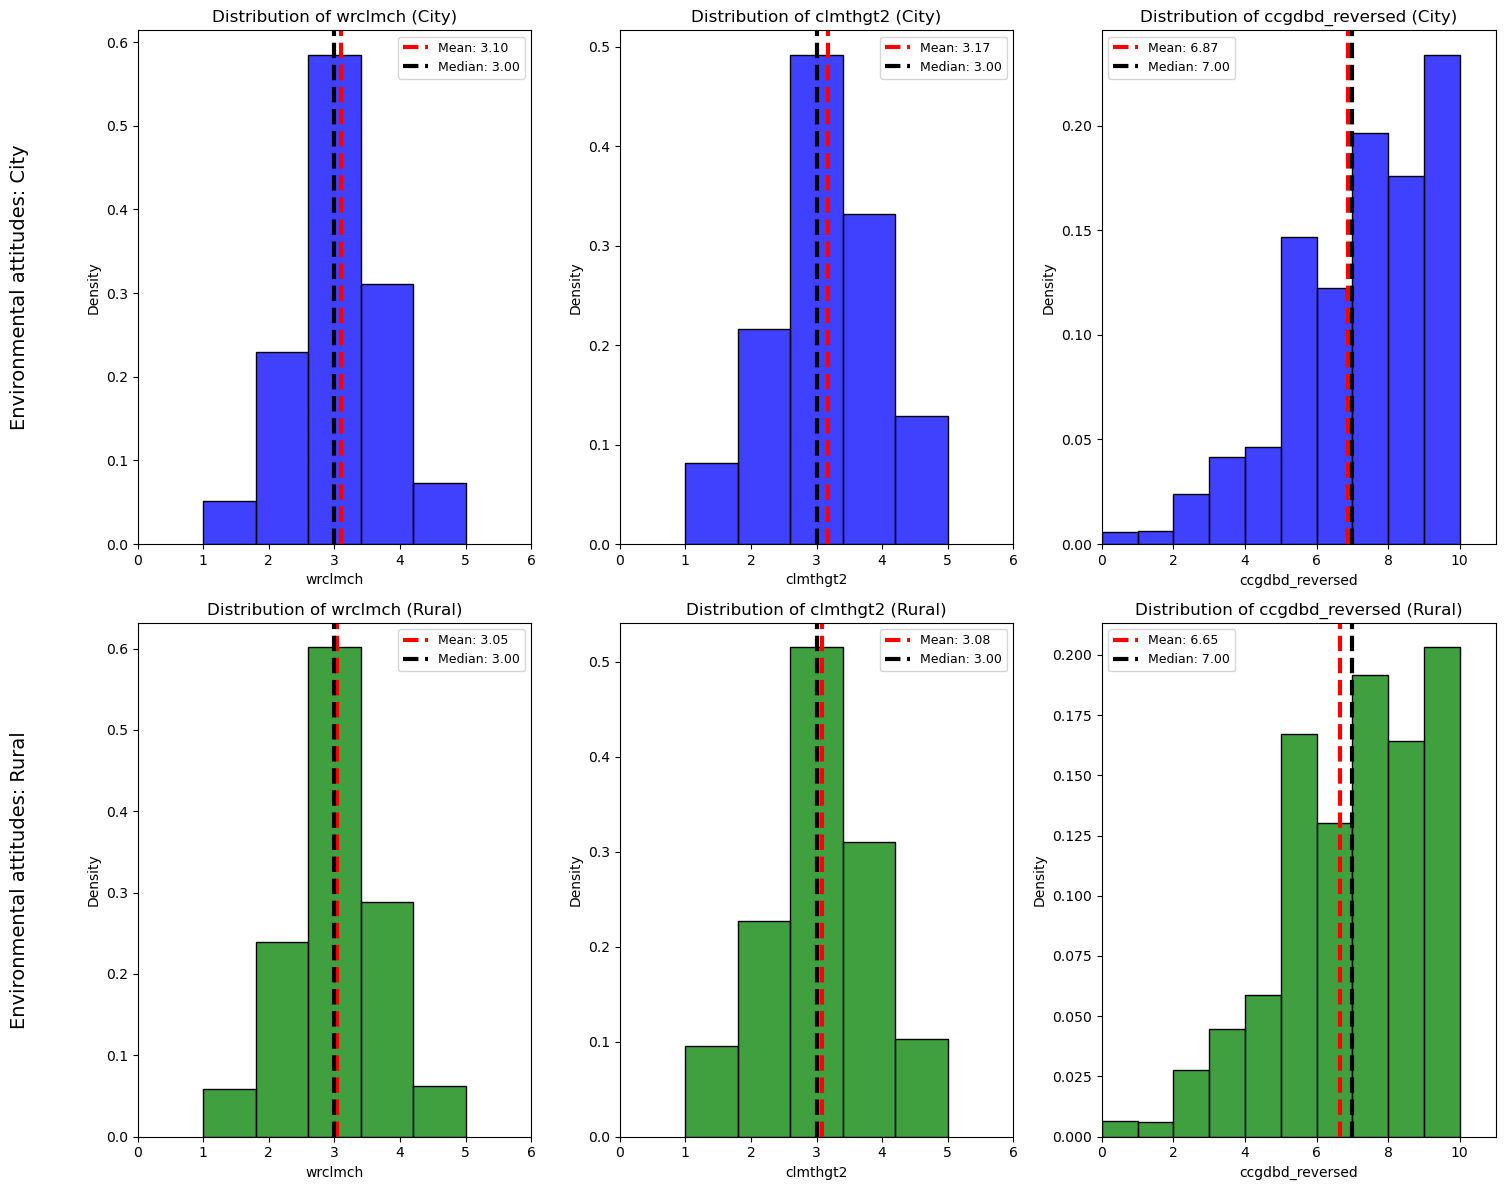

In [22]:
needed_columns = ['wrclmch', 'clmthgt2', 'ccgdbd_reversed']

stats_attitudes = {
    col: {
        'city': (city_data[col].mean(), city_data[col].median()),
        'rural': (rural_data[col].mean(), rural_data[col].median())
    }
    for col in needed_columns
}

plot_settings = {
    'wrclmch': {'bins': 5, 'xlim': (0, 6)},
    'clmthgt2': {'bins': 5, 'xlim': (0, 6)},
    'ccgdbd_reversed': {'bins': 10, 'xlim': (0, 11)}
}

fig, axes = plt.subplots(2, 3, figsize=(15, 12))

for i, col in enumerate(needed_columns):
    row, col_idx = divmod(i, 3)

    # Plot City
    sns.histplot(data=city_data, x=col, bins=plot_settings[col]['bins'], kde=False, 
                 stat='density', ax=axes[0, col_idx], color='blue')
    axes[0, col_idx].set_title(f'Distribution of {col} (City)', fontsize=12)
    axes[0, col_idx].set_xlim(plot_settings[col]['xlim'])

    # Mean and Median Lines for City
    city_mean, city_median = stats_attitudes[col]['city']
    axes[0, col_idx].axvline(city_mean, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {city_mean:.2f}')
    axes[0, col_idx].axvline(city_median, color='black', linestyle='dashed', linewidth=3, label=f'Median: {city_median:.2f}')
    axes[0, col_idx].legend(fontsize=9)

    # Plot Rural
    sns.histplot(data=rural_data, x=col, bins=plot_settings[col]['bins'], kde=False, 
                 stat='density', ax=axes[1, col_idx], color='green')
    axes[1, col_idx].set_title(f'Distribution of {col} (Rural)', fontsize=12)
    axes[1, col_idx].set_xlim(plot_settings[col]['xlim'])

    # Mean and Median Lines for Rural
    rural_mean, rural_median = stats_attitudes[col]['rural']
    axes[1, col_idx].axvline(rural_mean, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {rural_mean:.2f}')
    axes[1, col_idx].axvline(rural_median, color='black', linestyle='dashed', linewidth=3, label=f'Median: {rural_median:.2f}')
    axes[1, col_idx].legend(fontsize=9)

axes[0, 0].annotate('Environmental attitudes: City', xy=(0, 0.5), xytext=(-0.3, 0.5), 
                    textcoords='axes fraction', fontsize=14, ha='center', va='center', rotation=90)
axes[1, 0].annotate('Environmental attitudes: Rural', xy=(0, 0.5), xytext=(-0.3, 0.5), 
                    textcoords='axes fraction', fontsize=14, ha='center', va='center', rotation=90)

plt.tight_layout()
plt.show()


### Environmental Behaviors

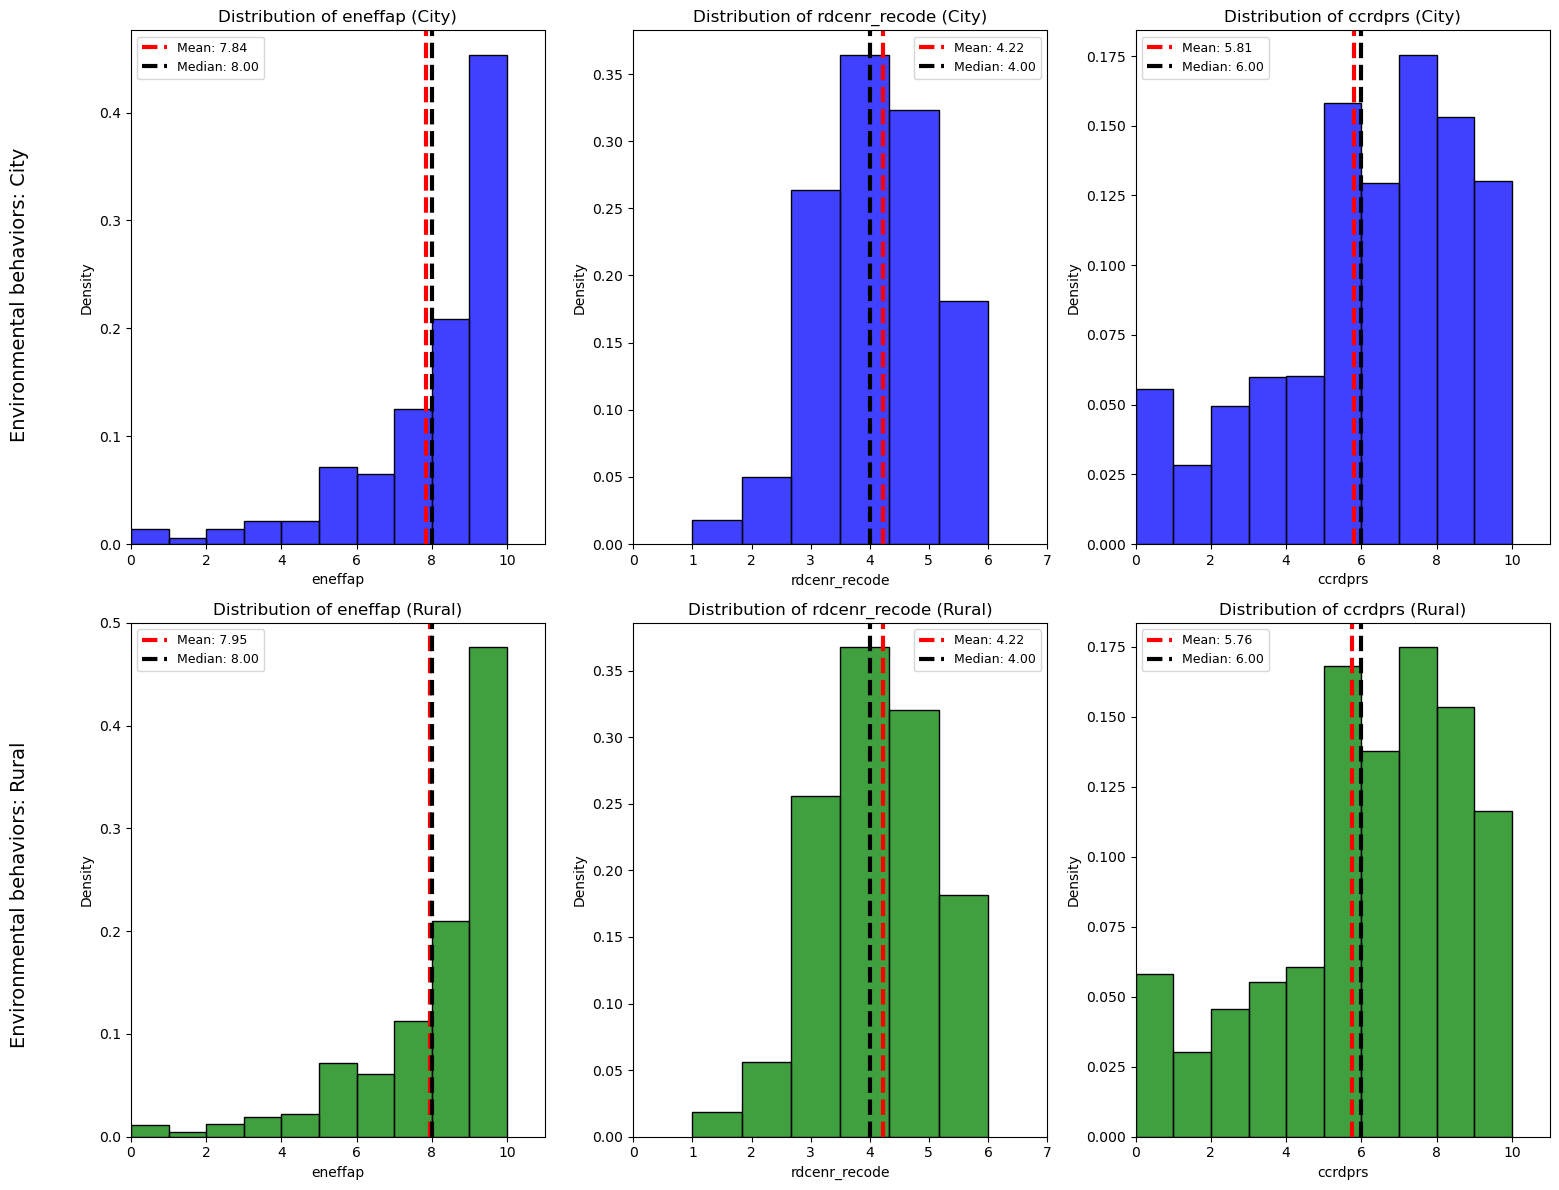

In [23]:
needed_columns = ['eneffap', 'rdcenr_recode', 'ccrdprs']

stats_beahivors = {
    col: {
        'city': (city_data[col].mean(), city_data[col].median()),
        'rural': (rural_data[col].mean(), rural_data[col].median())
    }
    for col in needed_columns
}

plot_settings = {
    'eneffap': {'bins': 10, 'xlim': (0, 11)},
    'rdcenr_recode': {'bins': 6, 'xlim': (0, 7)},
    'ccrdprs': {'bins': 10, 'xlim': (0, 11)}
}

fig, axes = plt.subplots(2, 3, figsize=(15, 12))

for i, col in enumerate(needed_columns):
    row, col_idx = divmod(i, 3)

    # Plot City
    sns.histplot(data=city_data, x=col, bins=plot_settings[col]['bins'], kde=False, 
                 stat='density', ax=axes[0, col_idx], color='blue')
    axes[0, col_idx].set_title(f'Distribution of {col} (City)', fontsize=12)
    axes[0, col_idx].set_xlim(plot_settings[col]['xlim'])

    # Mean and Median Lines for City
    city_mean, city_median = stats_beahivors[col]['city']
    axes[0, col_idx].axvline(city_mean, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {city_mean:.2f}')
    axes[0, col_idx].axvline(city_median, color='black', linestyle='dashed', linewidth=3, label=f'Median: {city_median:.2f}')
    axes[0, col_idx].legend(fontsize=9)

    # Plot Rural
    sns.histplot(data=rural_data, x=col, bins=plot_settings[col]['bins'], kde=False, 
                 stat='density', ax=axes[1, col_idx], color='green')
    axes[1, col_idx].set_title(f'Distribution of {col} (Rural)', fontsize=12)
    axes[1, col_idx].set_xlim(plot_settings[col]['xlim'])

    # Mean and Median Lines for Rural
    rural_mean, rural_median = stats_beahivors[col]['rural']
    axes[1, col_idx].axvline(rural_mean, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {rural_mean:.2f}')
    axes[1, col_idx].axvline(rural_median, color='black', linestyle='dashed', linewidth=3, label=f'Median: {rural_median:.2f}')
    axes[1, col_idx].legend(fontsize=9)
    

fig.text(-0.03, 0.75, 'Environmental behaviors: City', fontsize=14, ha='center', va='center', rotation=90)
fig.text(-0.03, 0.25, 'Environmental behaviors: Rural', fontsize=14, ha='center', va='center', rotation=90)


plt.tight_layout()
plt.show()


<hr>

### Recoding out dependent variables into common scale to run correlation matrix to see their relationship within category

##### Recoding `ccgdbd` to a scale of 1-5

In [24]:
def recode_ccgdbd(value):
    if value <= 2:       
        return 1
    elif value <= 4:     
        return 2
    elif value <= 6:     
        return 3
    elif value <= 8:     
        return 4
    elif value <= 10:    
        return 5
    else:
        return None 

data_needed['ccgdbd_recode'] = data_needed['ccgdbd_reversed'].apply(recode_ccgdbd)

In [25]:
data_needed.shape

(36185, 13)

In [26]:
data_needed

,idno,cntry,wrclmch,clmthgt2,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type,ccgdbd_reversed,rdcenr_recode,ccgdbd_recode
0,1,AT,4,4,8,4,8,7,0,City,0,4,1
1,2,AT,4,4,10,5,7,4,1,City,8,5,4
2,4,AT,4,4,9,4,8,3,5,Rural,8,4,4
3,6,AT,3,3,10,4,6,3,0,City,3,4,2
4,10,AT,4,2,10,6,6,3,5,City,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39353,1303,SI,3,3,10,5,5,4,1,Rural,5,5,3
39354,1304,SI,3,3,5,3,4,6,5,City,5,3,3
39355,1305,SI,4,4,10,6,7,6,0,City,9,6,5
39356,1306,SI,3,4,8,4,7,7,4,City,6,4,3


##### Recoding `eneffap` and `ccrdprs` to a scale of 1-6

In [27]:
def recode_to_rdcenr_scale(value):
    if value <= 1:
        return 1
    elif value <= 3:
        return 2
    elif value <= 5:
        return 3
    elif value <= 7:
        return 4
    elif value <= 9:
        return 5
    elif value == 10:
        return 6
    else:
        return None

data_needed['eneffap_recode'] = data_needed['eneffap'].apply(recode_to_rdcenr_scale)
data_needed['ccrdprs_recode'] = data_needed['ccrdprs'].apply(recode_to_rdcenr_scale)

In [28]:
data_needed

,idno,cntry,wrclmch,clmthgt2,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type,ccgdbd_reversed,rdcenr_recode,ccgdbd_recode,eneffap_recode,ccrdprs_recode
0,1,AT,4,4,8,4,8,7,0,City,0,4,1,5,5
1,2,AT,4,4,10,5,7,4,1,City,8,5,4,6,4
2,4,AT,4,4,9,4,8,3,5,Rural,8,4,4,5,5
3,6,AT,3,3,10,4,6,3,0,City,3,4,2,6,4
4,10,AT,4,2,10,6,6,3,5,City,5,6,3,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39353,1303,SI,3,3,10,5,5,4,1,Rural,5,5,3,6,3
39354,1304,SI,3,3,5,3,4,6,5,City,5,3,3,3,3
39355,1305,SI,4,4,10,6,7,6,0,City,9,6,5,6,4
39356,1306,SI,3,4,8,4,7,7,4,City,6,4,3,5,4


<hr>

### Running Correlation Matrix

### Environmental Attitudes

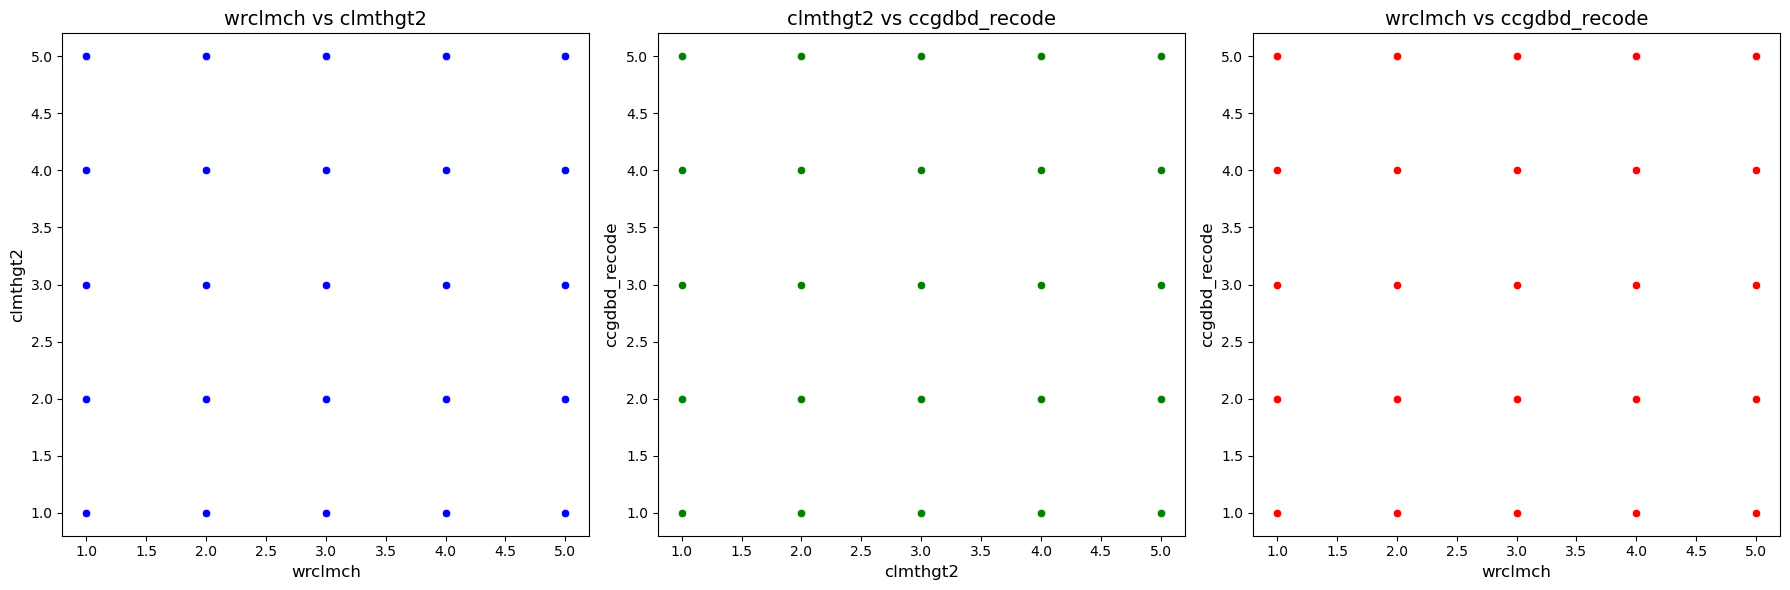

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# rclmch vs clmthgt2
sns.scatterplot(data=data_needed, x='wrclmch', y='clmthgt2', ax=axes[0], color='blue')
axes[0].set_title('wrclmch vs clmthgt2', fontsize=14)
axes[0].set_xlabel('wrclmch', fontsize=12)
axes[0].set_ylabel('clmthgt2', fontsize=12)

# clmthgt2 vs ccgdbd_recode
sns.scatterplot(data=data_needed, x='clmthgt2', y='ccgdbd_recode', ax=axes[1], color='green')
axes[1].set_title('clmthgt2 vs ccgdbd_recode', fontsize=14)
axes[1].set_xlabel('clmthgt2', fontsize=12)
axes[1].set_ylabel('ccgdbd_recode', fontsize=12)

# wrclmch vs ccgdbd_recode
sns.scatterplot(data=data_needed, x='wrclmch', y='ccgdbd_recode', ax=axes[2], color='red')
axes[2].set_title('wrclmch vs ccgdbd_recode', fontsize=14)
axes[2].set_xlabel('wrclmch', fontsize=12)
axes[2].set_ylabel('ccgdbd_recode', fontsize=12)

plt.tight_layout()
plt.show()

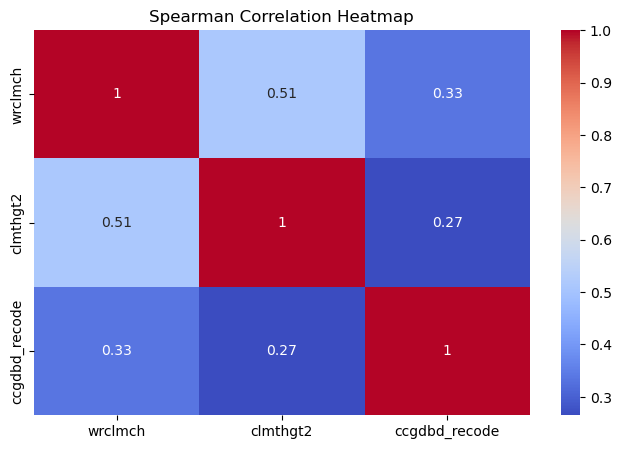

In [30]:
spearman_corr_attitudes = data_needed[['wrclmch', 'clmthgt2', 'ccgdbd_recode']].corr(method='spearman')

plt.figure(figsize=(8, 5))
sns.heatmap(spearman_corr_attitudes, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()


### Environmental Behaviors

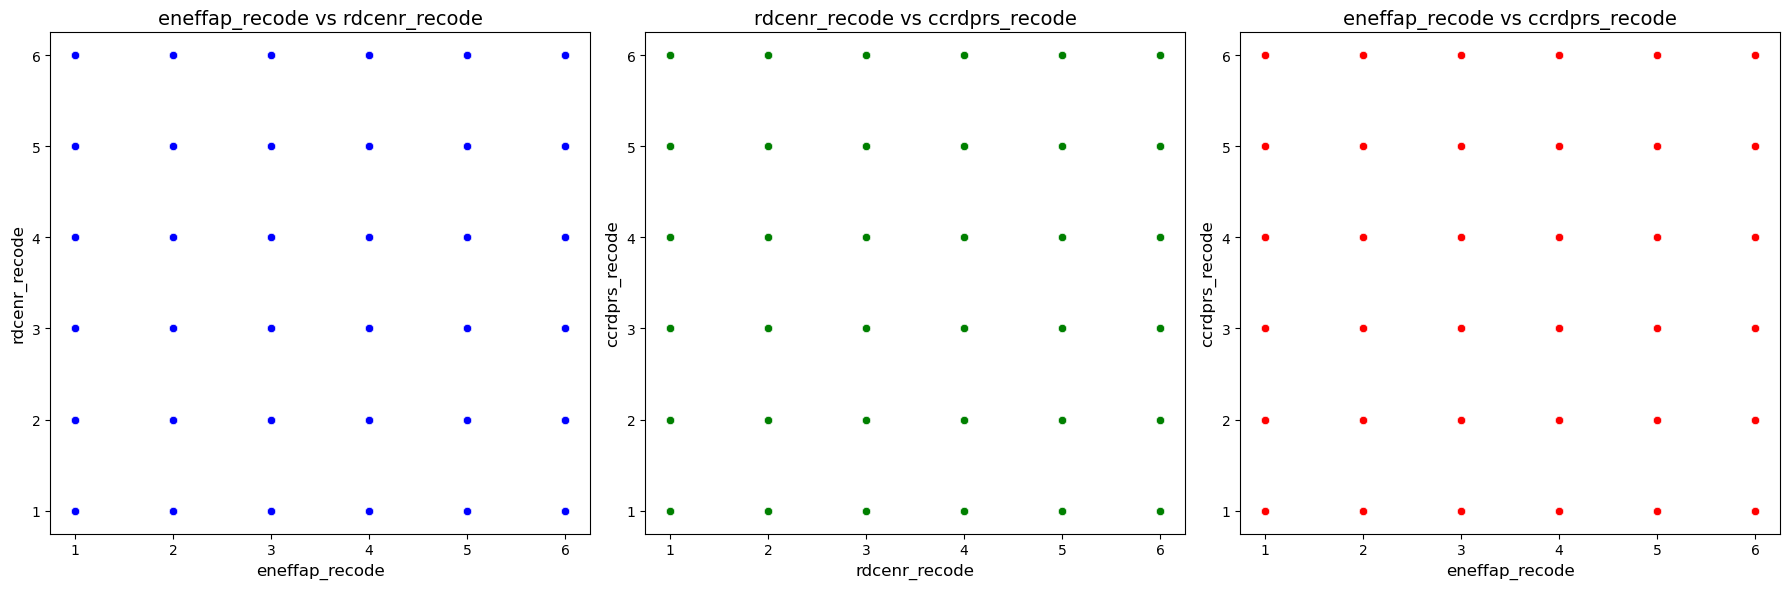

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# eneffap_recode vs rdcenr_recode
sns.scatterplot(data=data_needed, x='eneffap_recode', y='rdcenr_recode', ax=axes[0], color='blue')
axes[0].set_title('eneffap_recode vs rdcenr_recode', fontsize=14)
axes[0].set_xlabel('eneffap_recode', fontsize=12)
axes[0].set_ylabel('rdcenr_recode', fontsize=12)

# rdcenr_recode vs ccrdprs_recode
sns.scatterplot(data=data_needed, x='rdcenr_recode', y='ccrdprs_recode', ax=axes[1], color='green')
axes[1].set_title('rdcenr_recode vs ccrdprs_recode', fontsize=14)
axes[1].set_xlabel('rdcenr_recode', fontsize=12)
axes[1].set_ylabel('ccrdprs_recode', fontsize=12)

# eneffap_recode vs ccrdprs_recode
sns.scatterplot(data=data_needed, x='eneffap_recode', y='ccrdprs_recode', ax=axes[2], color='red')
axes[2].set_title('eneffap_recode vs ccrdprs_recode', fontsize=14)
axes[2].set_xlabel('eneffap_recode', fontsize=12)
axes[2].set_ylabel('ccrdprs_recode', fontsize=12)

plt.tight_layout()
plt.show()

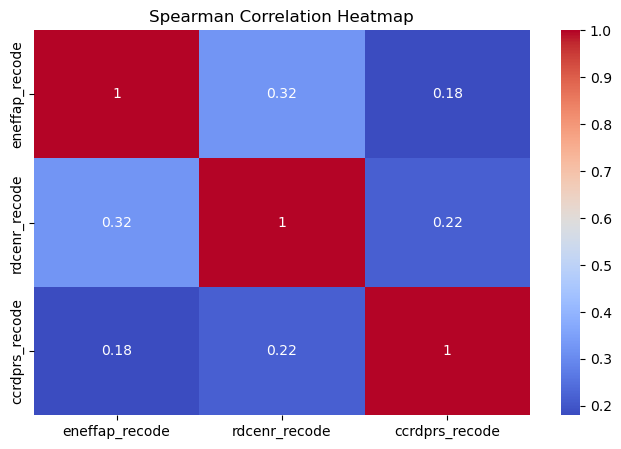

In [32]:
spearman_corr_behaviors = data_needed[['eneffap_recode', 'rdcenr_recode', 'ccrdprs_recode']].corr(method='spearman')

plt.figure(figsize=(8, 5))
sns.heatmap(spearman_corr_behaviors, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()


##### As we can see from the correlation matrices that the variables are not positively correlated to create a common index per attitude and behavior. We need drop all newly created 'recorded variables'

In [33]:
data_needed.drop(columns=['ccgdbd_recode', 'eneffap_recode', 'ccrdprs_recode'], inplace=True)

<hr>

### Data from World Bank about education

In [34]:
world_bank_df = pd.read_csv('Data/01d4cc76-d950-4515-a40d-b85330acb7b9_Data.csv')
world_bank_df

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Austria,AUT,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,98.968643
1,Belgium,BEL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,84.790001
2,Czechia,CZE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.800003
3,Estonia,EST,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.114182
4,Finland,FIN,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,85.521523
5,France,FRA,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,83.690002
6,Germany,DEU,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,96.510002
7,Hungary,HUN,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,97.180000
8,Iceland,ISL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.538902
9,Ireland,IRL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,86.810600


In [35]:
# Setting '2016 [YR2016]' as a variable to call it more efficiently
year = '2016 [YR2016]'

In [36]:
set(world_bank_df[year])

{nan,
 nan,
 nan,
 54.189998626709,
 nan,
 75.8000030517578,
 80.1383743286133,
 83.6900024414062,
 84.7900009155273,
 85.3300018310547,
 85.5215225219727,
 86.8106002807617,
 89.7099990844727,
 90.5400009155273,
 95.1800003051758,
 96.5100021362305,
 96.8899993896484,
 97.1800003051758,
 97.620002746582,
 97.7616348266602,
 98.9686431884766,
 99.1141815185547,
 99.2300033569336,
 99.5389022827148,
 99.8000030517578,
 nan}

In [37]:
world_bank_df.replace('..', np.nan, inplace=True) # replace '..' for nan values
world_bank_df = world_bank_df[~world_bank_df[year].isna()] # remove all nan values

<hr>

### Converting 3 letter country abbreviation into 2 letter one to be able to merge with the main dataset

In [38]:
world_bank_df['Country Code'].unique()

array(['AUT', 'BEL', 'CZE', 'EST', 'FIN', 'FRA', 'DEU', 'HUN', 'ISL',
       'IRL', 'ITA', 'LTU', 'NLD', 'NOR', 'POL', 'PRT', 'SVN', 'ESP',
       'SWE', 'CHE', 'GBR'], dtype=object)

In [39]:
three_to_two = {
    'AUT': 'AT', 
    'BEL': 'BE', 
    'CZE': 'CZ', 
    'EST': 'EE', 
    'FIN': 'FI',
    'FRA': 'FR', 
    'DEU': 'DE', 
    'HUN': 'HU', 
    'ISL': 'IS', 
    'IRL': 'IE',
    'ITA': 'IT', 
    'LTU': 'LT', 
    'NLD': 'NL', 
    'NOR': 'NO', 
    'POL': 'PL',
    'PRT': 'PT', 
    'SVN': 'SI', 
    'ESP': 'ES', 
    'SWE': 'SE', 
    'CHE': 'CH',
    'GBR': 'GB'
}

world_bank_df['Country Code'] = world_bank_df['Country Code'].map(three_to_two)
world_bank_df


/var/folders/xv/bb6vqsv155qb6_tyzdzfys8c0000gn/T/ipykernel_32506/3257060602.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_bank_df['Country Code'] = world_bank_df['Country Code'].map(three_to_two)


,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Austria,AT,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,98.968643
1,Belgium,BE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,84.790001
2,Czechia,CZ,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.800003
3,Estonia,EE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.114182
4,Finland,FI,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,85.521523
5,France,FR,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,83.690002
6,Germany,DE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,96.510002
7,Hungary,HU,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,97.180000
8,Iceland,IS,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.538902
9,Ireland,IE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,86.810600


<hr>

### Pivot the dataframe to have a proper dataframe

In [40]:
world_bank_df = world_bank_df.pivot(columns='Series Name', index='Country Code', values=year).reset_index()
world_bank_df.columns.name = None
world_bank_df

,Country Code,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,AT,98.968643
1,BE,84.790001
2,CH,96.889999
3,CZ,99.800003
4,DE,96.510002
5,EE,99.114182
6,ES,75.800003
7,FI,85.521523
8,FR,83.690002
9,GB,97.761635


### Merge the two DataFrames: Survey and World Bank


In [41]:
survey_and_wb = data_needed.merge(world_bank_df, left_on='cntry', right_on='Country Code', how='left')

survey_and_wb.drop(columns=['Country Code'], inplace=True)

survey_and_wb.head()

,idno,cntry,wrclmch,clmthgt2,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type,ccgdbd_reversed,rdcenr_recode,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,1,AT,4,4,8,4,8,7,0,City,0,4,98.968643
1,2,AT,4,4,10,5,7,4,1,City,8,5,98.968643
2,4,AT,4,4,9,4,8,3,5,Rural,8,4,98.968643
3,6,AT,3,3,10,4,6,3,0,City,3,4,98.968643
4,10,AT,4,2,10,6,6,3,5,City,5,6,98.968643


In [42]:
survey_and_wb

,idno,cntry,wrclmch,clmthgt2,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type,ccgdbd_reversed,rdcenr_recode,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,1,AT,4,4,8,4,8,7,0,City,0,4,98.968643
1,2,AT,4,4,10,5,7,4,1,City,8,5,98.968643
2,4,AT,4,4,9,4,8,3,5,Rural,8,4,98.968643
3,6,AT,3,3,10,4,6,3,0,City,3,4,98.968643
4,10,AT,4,2,10,6,6,3,5,City,5,6,98.968643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36180,1303,SI,3,3,10,5,5,4,1,Rural,5,5,97.620003
36181,1304,SI,3,3,5,3,4,6,5,City,5,3,97.620003
36182,1305,SI,4,4,10,6,7,6,0,City,9,6,97.620003
36183,1306,SI,3,4,8,4,7,7,4,City,6,4,97.620003


<hr>

### Testing

##### Let us check for normality of the variables using Kolmogorov-Smirnov Test for city and rural to choose either parametric or non-parametric approach

In [43]:
city_data_test = survey_and_wb[survey_and_wb['area_type'] == 'City']
rural_data_test = survey_and_wb[survey_and_wb['area_type'] == 'Rural']

In [44]:
needed_variables = ['wrclmch', 'clmthgt2', 'ccgdbd_reversed', 'rdcenr_recode', 'eneffap', 'ccrdprs']

def kolmogorov_test(data, variable, area_type):
    
    stat, p = kstest(data[variable], 'norm')
    print(f"\nKolmogorov-Smirnov Test for {variable} ({area_type}):")
    print(f"Statistic: {stat:.3f}, p-value: {p:.3f}")
    if p > 0.05:
        print("The data follows a normal distribution.")
    else:
        print("The data does not follow a normal distribution.")

for var in needed_variables:
    # Test for City
    kolmogorov_test(city_data_test, var, "City")
    # Test for Rural
    kolmogorov_test(rural_data_test, var, "Rural")



Kolmogorov-Smirnov Test for wrclmch (City):
Statistic: 0.936, p-value: 0.000
The data does not follow a normal distribution.

Kolmogorov-Smirnov Test for wrclmch (Rural):
Statistic: 0.930, p-value: 0.000
The data does not follow a normal distribution.

Kolmogorov-Smirnov Test for clmthgt2 (City):
Statistic: 0.912, p-value: 0.000
The data does not follow a normal distribution.

Kolmogorov-Smirnov Test for clmthgt2 (Rural):
Statistic: 0.901, p-value: 0.000
The data does not follow a normal distribution.

Kolmogorov-Smirnov Test for ccgdbd_reversed (City):
Statistic: 0.965, p-value: 0.000
The data does not follow a normal distribution.

Kolmogorov-Smirnov Test for ccgdbd_reversed (Rural):
Statistic: 0.965, p-value: 0.000
The data does not follow a normal distribution.

Kolmogorov-Smirnov Test for rdcenr_recode (City):
Statistic: 0.962, p-value: 0.000
The data does not follow a normal distribution.

Kolmogorov-Smirnov Test for rdcenr_recode (Rural):
Statistic: 0.962, p-value: 0.000
The da

##### Based on the results we see that all of them do not follow a normal distribution despite the visualization of the distributions, so we are better to use non-parametric tests

<hr>

#### <span style="color:navajowhite;">_Hypothesis Test 1_</span>
- H0: There is no difference between the environmental <ins>attitudes</ins> of urban and rural residents.
- H1: There is a difference between the environmental <ins>attitudes</ins> of urban and rural residents.


### Compare City with Rural

`wrclmch`

In [45]:
wrclmch_city = city_data_test['wrclmch']
wrclmch_rural = rural_data_test['wrclmch']

In [46]:
mannwhitneyu(wrclmch_city, wrclmch_rural)

MannwhitneyuResult(statistic=159219498.5, pvalue=4.023625813695448e-08)

##### Conclusion: _We reject H0 and say that the two samples have different median_. So, city and rural people worry differently about climate change.

In [47]:
mannwhitneyu(wrclmch_city, wrclmch_rural, alternative='greater')

MannwhitneyuResult(statistic=159219498.5, pvalue=2.011812906847724e-08)

##### Conclusion: _We reject H0 and say that the city worries more about climate change than rural people._

### Let's check for effect size using Cliff's delta

In [48]:
def cliffs_delta(group1, group2):
    n1, n2 = len(group1), len(group2)
    comparisons = [(x > y) - (x < y) for x in group1 for y in group2]
    delta = sum(comparisons) / (n1 * n2)
    return delta

In [49]:
cliffs_delta(wrclmch_city, wrclmch_rural)

0.032076673931933725

`clmthgt2`

In [50]:
clmthgt2_city = city_data_test['clmthgt2']
clmthgt2_rural = rural_data_test['clmthgt2']

In [51]:
mannwhitneyu(clmthgt2_city, clmthgt2_rural)

MannwhitneyuResult(statistic=161371833.0, pvalue=1.258973587205695e-14)

##### Conclusion: _We reject H0 and say that the two samples have different median_. So, city and rural people viewpoint about climate changed differently.

In [52]:
mannwhitneyu(clmthgt2_city, clmthgt2_rural, alternative='greater')

MannwhitneyuResult(statistic=161371833.0, pvalue=6.294867936028475e-15)

##### Conclusion: _We reject H0 and say that city viewpoint about climate changed a lot than rural people viewpoint._

##### _cliff's delta_

In [53]:
cliffs_delta(clmthgt2_city, clmthgt2_rural)

0.046028320890229804

`ccgdbd_reversed`

In [54]:
ccgdbd_reversed_city = city_data_test['ccgdbd_reversed']
ccgdbd_reversed_rural = rural_data_test['ccgdbd_reversed']

In [55]:
mannwhitneyu(ccgdbd_reversed_city, ccgdbd_reversed_rural)

MannwhitneyuResult(statistic=163466863.0, pvalue=5.560786212903515e-22)

##### Conclusion: _We reject H0 and say that the two samples have different median_. So, city and rural people have different viewpoint about how climate change impact globally.

In [56]:
mannwhitneyu(ccgdbd_reversed_city, ccgdbd_reversed_rural, alternative='greater')

MannwhitneyuResult(statistic=163466863.0, pvalue=2.7803931064517573e-22)

##### Conclusion: _We reject H0 and say that city people have more worries about climate change impact globally than rural people._

##### _cliff's delta_

In [57]:
cliffs_delta(ccgdbd_reversed_city, ccgdbd_reversed_rural)

0.059608514362498644

<hr>

#### <span style="color:navajowhite;">_Hypothesis Test 2_</span>
- H0: There is no difference between the environmental <ins>behaviours</ins> of urban and rural residents.
- H1: There is a difference between the environmental <ins>behaviours</ins> of urban and rural residents


`rdcenr_recode`

In [58]:
rdcenr_recode_city = city_data_test['rdcenr_recode']
rdcenr_recode_rural = rural_data_test['rdcenr_recode']

In [59]:
mannwhitneyu(rdcenr_recode_city, rdcenr_recode_rural)

MannwhitneyuResult(statistic=154491911.5, pvalue=0.813122038714027)

##### Conclusion: _We can not reject H0 and say that the two samples have different median_. So, city and rural people have similar viewpoint about energy use reduction.

`eneffap`

In [60]:
eneffap_city = city_data_test['eneffap']
eneffap_rural = rural_data_test['eneffap']

In [61]:
mannwhitneyu(eneffap_city, eneffap_rural)

MannwhitneyuResult(statistic=149920881.5, pvalue=4.107830425890886e-06)

##### Conclusion: _We reject H0 and say that the two samples have different median_. So, city and rural people have differeny viewpoint about buying most energy efficient home appliance.

In [62]:
mannwhitneyu(eneffap_city, eneffap_rural, alternative='less')

MannwhitneyuResult(statistic=149920881.5, pvalue=2.053915212945443e-06)

##### Conclusion: _We reject H0 and say that city people buy less energy efficient home appliance than rural people._

##### _cliff's delta_

In [63]:
cliffs_delta(eneffap_city, eneffap_rural)

-0.02819788914569672

`ccrdprs`

In [64]:
ccrdprs_city = city_data_test['ccrdprs']
ccrdprs_rural = rural_data_test['ccrdprs']

In [65]:
mannwhitneyu(ccrdprs_city, ccrdprs_rural)

MannwhitneyuResult(statistic=156366505.5, pvalue=0.02845555859415422)

##### Conclusion: _We reject H0 and say that the two samples have different median 5% significance level._ So, city and rural people have different viewpoint about personal responsibility to climate change reduction.

In [66]:
mannwhitneyu(ccrdprs_city, ccrdprs_rural, alternative='greater')

MannwhitneyuResult(statistic=156366505.5, pvalue=0.01422777929707711)

##### Conclusion: _We reject H0 at 5% significance level and say that the city feel more personal responsibility to climate change reduction than rural people._

##### _cliff's delta_

In [67]:
cliffs_delta(ccrdprs_city, ccrdprs_rural)

0.013583288674906997

<hr>

#### <span style="color:navajowhite;">_Hypothesis Test 3_</span>
- H0: There is no difference in the gap of environmental attitudes/behaviours of urban and rural residents between countries.
- H1: There is a difference in the gap of environmental attitudes/behaviours of urban and rural residents between countries.


In [68]:
attitudes_variables = ['wrclmch', 'clmthgt2', 'ccgdbd_reversed']

results_attitudes = {}

for var in attitudes_variables:

    filtered_data_attitudes = survey_and_wb[[var, 'area_type', 'cntry']]
    
    formula_attitudes = f'{var} ~ C(area_type) * C(cntry)'
    
    model_attitudes = ols(formula_attitudes, data=filtered_data_attitudes).fit()
    anova_table_attitudes = sm.stats.anova_lm(model_attitudes, typ=2)  # Type II ANOVA
    
    results_attitudes[var] = anova_table_attitudes

for var, table in results_attitudes.items():
    print(f"Two-Way ANOVA Results for {var}:")
    print(table)
    print("\n")


Two-Way ANOVA Results for wrclmch:
                             sum_sq       df           F        PR(>F)
C(area_type)              58.246992      1.0   76.179196  2.699340e-18
C(cntry)                1820.355187     20.0  119.038932  0.000000e+00
C(area_type):C(cntry)     55.260596     20.0    3.613670  7.875866e-08
Residual               27635.117439  36143.0         NaN           NaN


Two-Way ANOVA Results for clmthgt2:
                             sum_sq       df           F        PR(>F)
C(area_type)             100.918407      1.0  102.654174  4.297916e-24
C(cntry)                3151.221893     20.0  160.271099  0.000000e+00
C(area_type):C(cntry)    112.480909     20.0    5.720777  3.258461e-15
Residual               35531.862401  36143.0         NaN           NaN


Two-Way ANOVA Results for ccgdbd_reversed:
                              sum_sq       df          F         PR(>F)
C(area_type)              345.247900      1.0  75.870120   3.155666e-18
C(cntry)                 552

In [69]:
behavior_variables = ['eneffap', 'rdcenr_recode', 'ccrdprs']

results_behavior = {}

for var in behavior_variables:

    filtered_data_behavior = survey_and_wb[[var, 'area_type', 'cntry']]
    
    formula_behavior = f'{var} ~ C(area_type) * C(cntry)'
    
    model_behavior = ols(formula_behavior, data=filtered_data_behavior).fit()
    anova_table_behavior = sm.stats.anova_lm(model_behavior, typ=2)  # Type II ANOVA
    
    results_behavior[var] = anova_table_behavior

for var, table in results_behavior.items():
    print(f"Two-Way ANOVA Results for {var}:")
    print(table)
    print("\n")


Two-Way ANOVA Results for eneffap:
                              sum_sq       df          F         PR(>F)
C(area_type)               13.876885      1.0   3.024165   8.204107e-02
C(cntry)                 5997.387629     20.0  65.349997  7.004767e-260
C(area_type):C(cntry)     410.961635     20.0   4.478007   9.168788e-11
Residual               165848.195701  36143.0        NaN            NaN


Two-Way ANOVA Results for rdcenr_recode:
                             sum_sq       df          F         PR(>F)
C(area_type)               2.098332      1.0   1.580778   2.086568e-01
C(cntry)                 903.613221     20.0  34.036840  5.275199e-130
C(area_type):C(cntry)     38.279511     20.0   1.441893   9.108913e-02
Residual               47976.387817  36143.0        NaN            NaN


Two-Way ANOVA Results for ccrdprs:
                              sum_sq       df           F        PR(>F)
C(area_type)              182.496011      1.0   30.153991  4.017468e-08
C(cntry)                27

<hr>

#### <span style="color:navajowhite;">_Hypothesis Test 4_</span>
- H0: There is no difference in the gap of environmental attitudes/behaviours of urban and rural residents between countries with high or low educational attainment.
- H1: There is a difference in the gap of environmental attitudes/behaviours of urban and rural residents between countries with high or low educational attainment.


In [70]:
attitude_columns = survey_and_wb[['wrclmch', 'clmthgt2', 'ccgdbd_reversed']]
behavior_columns = survey_and_wb[['eneffap', 'rdcenr_recode', 'ccrdprs']]
edu_column = 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'
group_column = 'cntry'
area_column = 'area_type' 

##### Calculate average attitudes and behaviors for city and rural groups

In [71]:
def calculate_country_differences(df, cols, edu_column):
    results = []
    for col in cols:
        # Group by country and area type (city/rural)
        averages = df.groupby([group_column, area_column])[col].mean().unstack()
        averages['difference'] = averages['City'] - averages['Rural']  # City - Rural
        averages[edu_column] = df.groupby(group_column)[edu_column].first()  # Add education data
        averages['indicator'] = col
        results.append(averages.reset_index())
    return pd.concat(results)

attitude_differences = calculate_country_differences(survey_and_wb, attitude_columns, edu_column)

behavior_differences = calculate_country_differences(survey_and_wb, behavior_columns, edu_column)

all_differences = pd.concat([attitude_differences, behavior_differences])

In [72]:
all_differences

area_type,cntry,City,Rural,difference,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",indicator
0,AT,3.124742,3.026807,0.097936,98.968643,wrclmch
1,BE,3.196934,3.174497,0.022437,84.790001,wrclmch
2,CH,3.221865,3.069007,0.152858,96.889999,wrclmch
3,CZ,2.802053,2.723539,0.078514,99.800003,wrclmch
4,DE,3.365260,3.337676,0.027583,96.510002,wrclmch
...,...,...,...,...,...,...
16,NO,6.415957,6.033748,0.382210,99.230003,ccrdprs
17,PL,5.724874,5.596184,0.128690,85.330002,ccrdprs
18,PT,5.834135,5.734286,0.099849,54.189999,ccrdprs
19,SE,6.567925,6.542169,0.025756,90.540001,ccrdprs


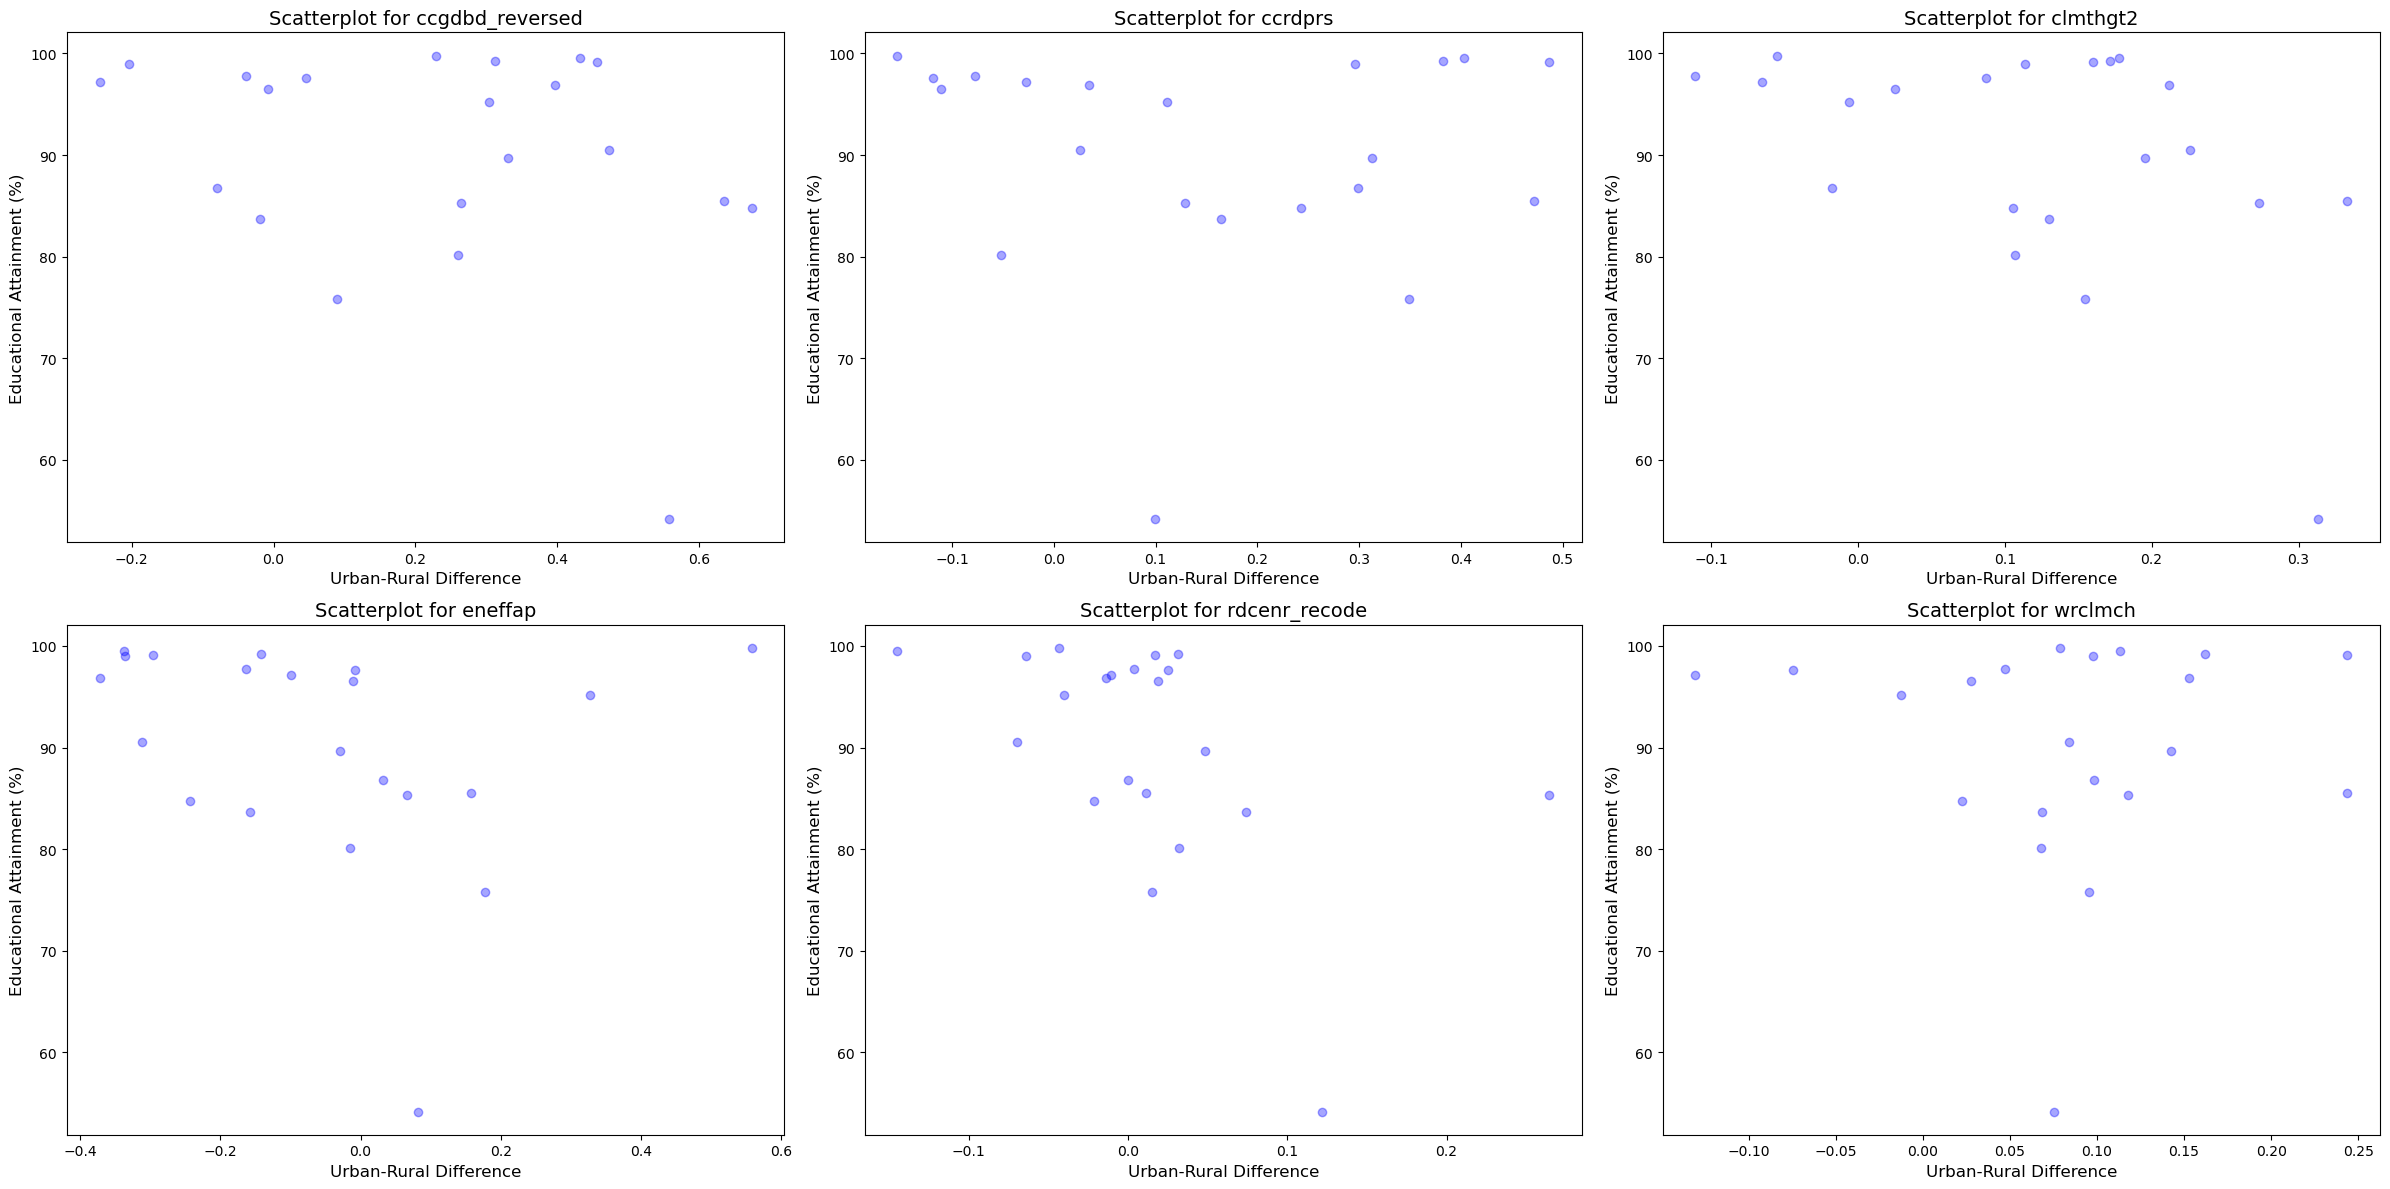

In [73]:
rows, cols = 2, 3  
fig, ax = plt.subplots(rows, cols, figsize=(24, 12))

axes = ax.ravel()

indicators = attitude_columns + behavior_columns

for idx, indicator in enumerate(indicators):

    subset = all_differences[all_differences['indicator'] == indicator]
    
    axes[idx].scatter(subset['difference'], subset[edu_column], color='b', alpha=0.35)
    axes[idx].set_title(f'Scatterplot for {indicator}', fontsize=14)
    axes[idx].set_xlabel('Urban-Rural Difference', fontsize=12)
    axes[idx].set_ylabel('Educational Attainment (%)', fontsize=12)

plt.tight_layout()

plt.show()

In [74]:
# Let's obtain Spearman's rho
rho_values = []
p_values = []
indicators = []

for indicator in attitude_columns + behavior_columns:
    
    subset = all_differences[all_differences['indicator'] == indicator]
    
    rho, p = stats.spearmanr(subset['difference'], subset[edu_column])
    
    indicators.append(indicator)
    rho_values.append(rho)
    p_values.append(p)

spearman_results = pd.DataFrame({
    'Indicator': indicators,
    'Education Indicator': edu_column,
    'Spearman Rho': rho_values,
    'P-Value': p_values
})

In [75]:
spearman_results

,Indicator,Education Indicator,Spearman Rho,P-Value
0,ccgdbd_reversed,"Educational attainment, at least completed low...",-0.177922,0.440350
1,ccrdprs,"Educational attainment, at least completed low...",-0.055844,0.809999
2,clmthgt2,"Educational attainment, at least completed low...",-0.310390,0.170877
3,eneffap,"Educational attainment, at least completed low...",-0.341558,0.129678
4,rdcenr_recode,"Educational attainment, at least completed low...",-0.492208,0.023415
5,wrclmch,"Educational attainment, at least completed low...",0.146753,0.525572


In [76]:
sum([1 for p in p_values if p<0.05])

1

In [77]:
# For what indicator are the country-level differences correlated with educational attainment?
print('Indicator\tSpearman\'s rho (p-value)')
for i in range(len(indicators)):
  if p_values[i]<0.05:
    print('%s\t%.2f (%.8f)'%(indicators[i],rho_values[i],p_values[i]))

Indicator	Spearman's rho (p-value)
rdcenr_recode	-0.49 (0.02341496)


<hr>

### Resampling with permutation for hypothesis 1,2, and 4

In [78]:
np.random.seed(42)  # Set the seed for reproducibility

##### _Hypothesis 1_

`wrclmch`

In [79]:
B = 10000
(ts, p) = stats.mannwhitneyu(wrclmch_city, wrclmch_rural, alternative='greater', method=stats.PermutationMethod(B))
print('U = %d' %ts)
print('p-value = %f' %p)

U = 159219498
p-value = 0.000100


`clmthgt2`

In [80]:
B = 10000
(ts, p) = stats.mannwhitneyu(clmthgt2_city, clmthgt2_rural, alternative='greater', method=stats.PermutationMethod(B))
print('U = %d' %ts)
print('p-value = %f' %p)

U = 161371833
p-value = 0.000100


`ccgdbd_reversed`

In [81]:
B = 10000
(ts, p) = stats.mannwhitneyu(ccgdbd_reversed_city, ccgdbd_reversed_rural, alternative='greater', method=stats.PermutationMethod(B))
print('U = %d' %ts)
print('p-value = %f' %p)

U = 163466863
p-value = 0.000100


##### _Hypothesis 2_

`rdcenr_recode`

In [82]:
B = 10000
(ts, p) = stats.mannwhitneyu(rdcenr_recode_city, rdcenr_recode_rural, method=stats.PermutationMethod(B))
print('U = %d' %ts)
print('p-value = %f' %p)

U = 154491911
p-value = 0.812919


`eneffap`

In [83]:
B = 10000
(ts, p) = stats.mannwhitneyu(eneffap_city, eneffap_rural, alternative='less', method=stats.PermutationMethod(B))
print('U = %d' %ts)
print('p-value = %f' %p)

U = 149920881
p-value = 0.000100


`ccrdprs`

In [84]:
B = 10000
(ts, p) = stats.mannwhitneyu(ccrdprs_city, ccrdprs_rural, alternative='greater', method=stats.PermutationMethod(B))
print('U = %d' %ts)
print('p-value = %f' %p)

U = 156366505
p-value = 0.013699


##### _Hypthesis 4_


Indicator: ccgdbd_reversed
Observed rho = -0.17792
Number of times rho* is more extreme than rho = 4305
p-value = 0.430500

Indicator: ccrdprs
Observed rho = -0.05584
Number of times rho* is more extreme than rho = 8090
p-value = 0.809000

Indicator: clmthgt2
Observed rho = -0.31039
Number of times rho* is more extreme than rho = 1672
p-value = 0.167200

Indicator: eneffap
Observed rho = -0.34156
Number of times rho* is more extreme than rho = 1248
p-value = 0.124800

Indicator: rdcenr_recode
Observed rho = -0.49221
Number of times rho* is more extreme than rho = 246
p-value = 0.024600

Indicator: wrclmch
Observed rho = 0.14675
Number of times rho* is more extreme than rho = 5194
p-value = 0.519400


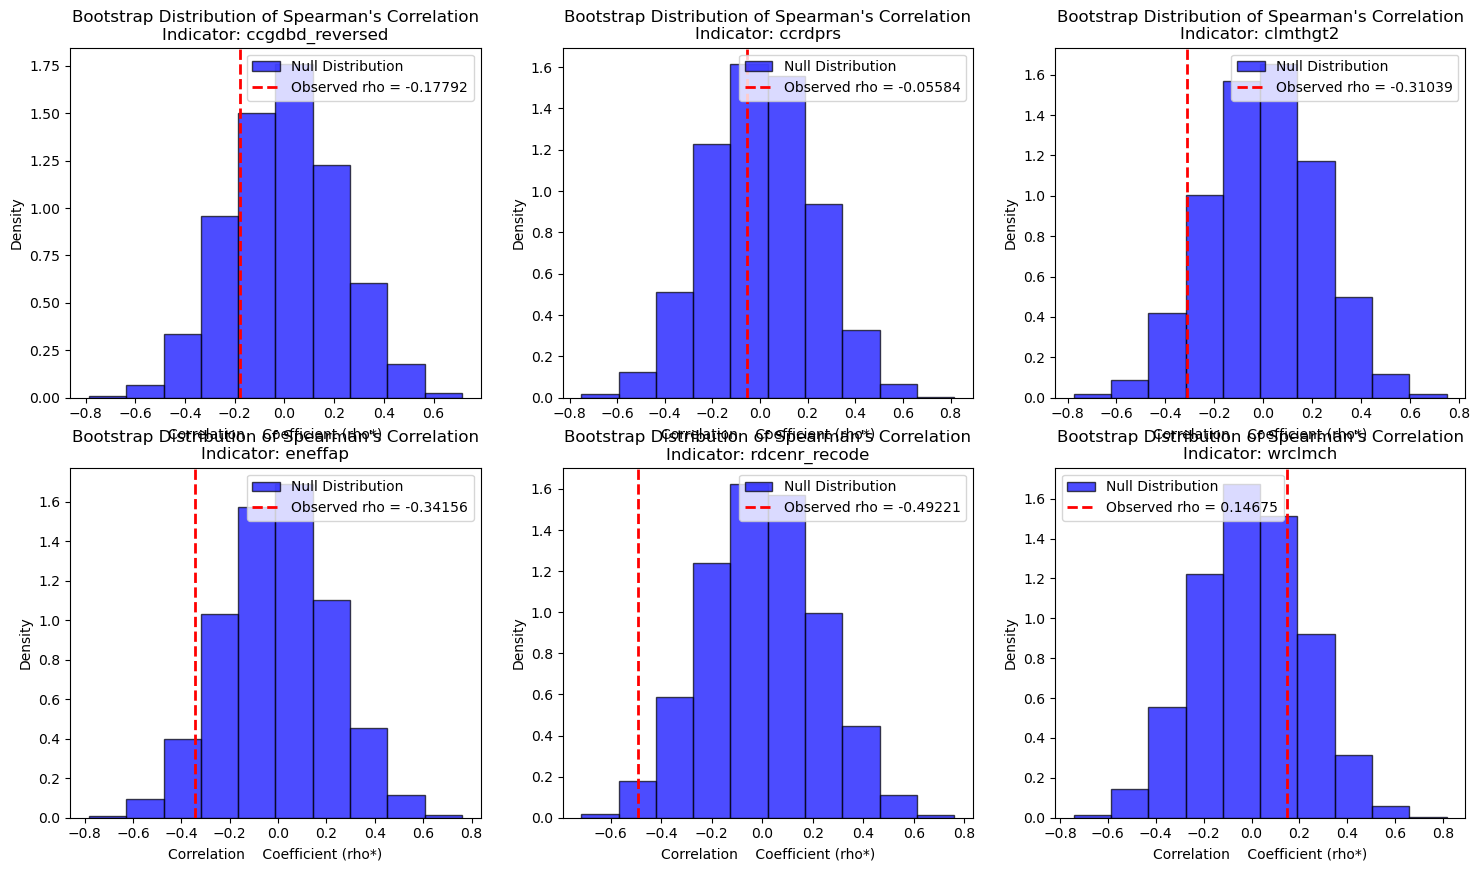

In [85]:
B = 10000

final_results = {}

fig, axes = plt.subplots(2,3, figsize=(18,10))

axes = axes.flatten()

for i, (indicator, group_data) in enumerate(all_differences.groupby('indicator')):
    print(f"\nIndicator: {indicator}")
    
    rho_values, _ = stats.spearmanr(group_data[edu_column], group_data['difference'])
    
    permutation_r = []
    
    # shuffled correlations
    for b in range(B):
        shuffled_y = group_data['difference'].sample(frac=1).reset_index(drop=True)
        r, _ = stats.spearmanr(group_data[edu_column], shuffled_y)
        permutation_r.append(r)
    
    nb_moreextreme_r = sum([1 for r in permutation_r if abs(r) > abs(rho_values)])
    pvalue = nb_moreextreme_r / B
    
    print('Observed rho = %.5f' % rho_values)
    print('Number of times rho* is more extreme than rho = %d' % nb_moreextreme_r)
    print('p-value = %f' % pvalue)

    ax = axes[i] 
    ax.hist(permutation_r, color='blue', edgecolor='black', alpha=0.7, density=True, label='Null Distribution')
    ax.axvline(x=rho_values, color='red', linestyle='--', linewidth=2, label=f'Observed rho = {rho_values:.5f}')
    ax.set_title(f"Bootstrap Distribution of Spearman's Correlation\nIndicator: {indicator}")
    ax.set_xlabel("Correlation    Coefficient (rho*)")
    ax.set_ylabel("Density")
    ax.legend()